In [1]:
import pandas as pd

In [178]:
event = pd.read_csv('events2016_subset_end.csv')

In [244]:
bike = pd.read_csv('CB2016_subset_1km.csv')

In [245]:
len(event),len(bike)

(134, 100666)

In [246]:
bike.head(1)

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate,stopdate
0,0,173,16:03:10,16:06:03,243,Fulton St & Rockwell Pl,40.688226,-73.979382,241,DeKalb Ave & S Portland Ave,40.68981,-73.974931,23976,Subscriber,1971.0,2,2016-01-01,2016-01-01


In [247]:
event.head(1)

,Unnamed: 0,Unnamed: 0.1,EventID,Event_type,Name,Start_Time,Start_Hour,End_Time,End_Hour,weekday,Date,E_Time
0,1,168,1490000000000000,basketball,Harlem Globetrotters,2016-01-02 19:00:00,19,2016-01-02 21:00:00,21,False,2016-01-02,21:00:00


In [248]:
event['Date'] = pd.to_datetime(event['Start_Time']).dt.date

In [249]:
#event['E_Time'] = pd.to_datetime(event['End_Time']).dt.time

In [250]:
event.head(1)

,Unnamed: 0,Unnamed: 0.1,EventID,Event_type,Name,Start_Time,Start_Hour,End_Time,End_Hour,weekday,Date,E_Time
0,1,168,1490000000000000,basketball,Harlem Globetrotters,2016-01-02 19:00:00,19,2016-01-02 21:00:00,21,False,2016-01-02,21:00:00


In [251]:
e = event[['Date','Event_type','End_Time']]

In [252]:
e.Date = pd.to_datetime(e.Date)
bike.startdate = pd.to_datetime(bike.startdate)

In [253]:
e.head(1)

,Date,Event_type,End_Time
0,2016-01-02,basketball,2016-01-02 21:00:00


In [151]:
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [154]:
t = pd.to_datetime(event['End_Time']).dt.hour + pd.to_datetime(event['End_Time']).dt.minute / 60

In [155]:
tt = pd.DataFrame(t)

In [156]:
tt.head()

,End_Time
0,21.0
1,21.5
2,21.5
3,21.5
4,21.5


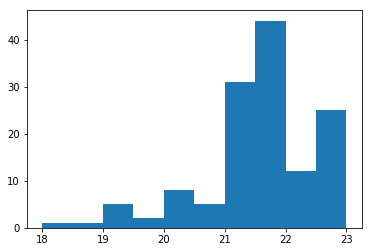

In [158]:
pl.hist(tt.End_Time)
pl.savefig('EndTimeDistribution.png',dpi=300)

In [254]:
bike.head(1)

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate,stopdate
0,0,173,16:03:10,16:06:03,243,Fulton St & Rockwell Pl,40.688226,-73.979382,241,DeKalb Ave & S Portland Ave,40.68981,-73.974931,23976,Subscriber,1971.0,2,2016-01-01,2016-01-01


In [255]:
joined = bike.merge(e,left_on='startdate',right_on='Date',how='left')

In [256]:
len(bike),len(joined)

(100666, 100666)

In [257]:
joined.head(1)

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,end station longitude,bikeid,usertype,birth year,gender,startdate,stopdate,Date,Event_type,End_Time
0,0,173,16:03:10,16:06:03,243,Fulton St & Rockwell Pl,40.688226,-73.979382,241,DeKalb Ave & S Portland Ave,...,-73.974931,23976,Subscriber,1971.0,2,2016-01-01,2016-01-01,NaT,NaN,NaN


In [258]:
joined.keys()

Index([u'Unnamed: 0', u'tripduration', u'starttime', u'stoptime',
       u'start station id', u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'startdate', u'stopdate',
       u'Date', u'Event_type', u'End_Time'],
      dtype='object')

In [259]:
joined.drop([u'Unnamed: 0', 
       u'Date'],axis=1,inplace=True)

In [260]:
joined.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate,stopdate,Event_type,End_Time
0,173,16:03:10,16:06:03,243,Fulton St & Rockwell Pl,40.688226,-73.979382,241,DeKalb Ave & S Portland Ave,40.68981,-73.974931,23976,Subscriber,1971.0,2,2016-01-01,2016-01-01,NaN,NaN


In [261]:
for i in joined[joined.End_Time.isnull()].index:
    joined.loc[i,'End_Time'] = pd.to_datetime("21:00:00")

In [262]:
joined.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate,stopdate,Event_type,End_Time
0,173,16:03:10,16:06:03,243,Fulton St & Rockwell Pl,40.688226,-73.979382,241,DeKalb Ave & S Portland Ave,40.68981,-73.974931,23976,Subscriber,1971.0,2,2016-01-01,2016-01-01,NaN,2017-12-05 21:00:00


In [263]:
joined['E_Time'] = pd.to_datetime(joined['End_Time']).dt.time

In [264]:
joined.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate,stopdate,Event_type,End_Time,E_Time
0,173,16:03:10,16:06:03,243,Fulton St & Rockwell Pl,40.688226,-73.979382,241,DeKalb Ave & S Portland Ave,40.68981,-73.974931,23976,Subscriber,1971.0,2,2016-01-01,2016-01-01,NaN,2017-12-05 21:00:00,21:00:00


In [265]:
joined.to_csv('JoinedEvent_CB2016_subset_1km.csv')